### Masive Data Assignment
 (second project)
Read, Clean, and prepare the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### neo_price

#### 1. Read the Data

In [2]:
# Read Bitcoin Cash Price
df = pd.read_csv('../data/raw/neo_price.csv', parse_dates = ['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,21.88,23.85,18.93,22.80,"91,402,300","1,093,860,000"
1,2017-09-04,30.44,30.44,17.40,21.83,"189,917,000","1,522,090,000"
2,2017-09-03,31.77,32.65,28.58,30.32,"43,232,300","1,588,690,000"
3,2017-09-02,31.69,34.81,28.55,31.72,"92,722,600","1,584,390,000"
4,2017-09-01,33.17,33.57,28.87,32.01,"75,418,900","1,658,680,000"


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [4]:
df.count()

Date          362
Open          362
High          362
Low           362
Close         362
Volume        362
Market Cap    362
dtype: int64

as we can see we have in this file 7 columns and each column has 362 cells

In [5]:
df.describe()

,Open,High,Low,Close
count,362.000000,362.000000,362.000000,362.000000
mean,4.172486,4.562649,3.760576,4.233630
std,9.946756,10.752224,8.971467,9.990614
min,0.080197,0.085211,0.072287,0.080181
25%,0.139660,0.146120,0.132966,0.139955
50%,0.189495,0.196152,0.179913,0.189814
75%,1.355000,1.542500,1.242500,1.357500
max,47.630000,52.630000,44.790000,47.490000


In [6]:
# General Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 7 columns):
Date          362 non-null datetime64[ns]
Open          362 non-null float64
High          362 non-null float64
Low           362 non-null float64
Close         362 non-null float64
Volume        362 non-null object
Market Cap    362 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 19.9+ KB


In [7]:
#check if the dataset is duplicated
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
357    False
358    False
359    False
360    False
361    False
Length: 362, dtype: bool

as we can see the data fram has 7 columns. each column has 362 cells, and there is no missing data, 


In [8]:
# Count missing data in each column
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

we can see there is no missing data 

### cleaning Data


In [9]:
print('Volume Data Type :', type(df.Volume[0]))
print('Market Cap Data Type :', type(df['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'str'>


In [10]:
# If Volume is equal to '-' convert it to 0
df.loc[df['Market Cap']=="-",'Market Cap']=0

In [11]:
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df.Volume = df.Volume.apply(convert_to_number)
df['Market Cap'] = df['Market Cap'].apply(lambda x: float(str(x).replace(',','')))

df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,362.000000,362.000000,362.000000,362.000000,3.620000e+02,3.620000e+02
mean,4.172486,4.562649,3.760576,4.233630,1.910023e+07,2.071129e+08
std,9.946756,10.752224,8.971467,9.990614,5.516568e+07,4.979571e+08
min,0.080197,0.085211,0.072287,0.080181,1.560000e+02,0.000000e+00
25%,0.139660,0.146120,0.132966,0.139955,2.075275e+04,6.218400e+06
50%,0.189495,0.196152,0.179913,0.189814,1.633035e+05,8.572575e+06
75%,1.355000,1.542500,1.242500,1.357500,7.408840e+06,6.763788e+07
max,47.630000,52.630000,44.790000,47.490000,4.486540e+08,2.381360e+09


In [12]:
# correlation between columns
correlation = df.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.992652,0.995139,0.991068,0.752055,0.999963
High,0.992652,1.000000,0.991973,0.998191,0.802871,0.992640
Low,0.995139,0.991973,1.000000,0.993770,0.733545,0.995110
Close,0.991068,0.998191,0.993770,1.000000,0.788545,0.991060
Volume,0.752055,0.802871,0.733545,0.788545,1.000000,0.752172
Market Cap,0.999963,0.992640,0.995110,0.991060,0.752172,1.000000


let's plot data between Market Cap and other variable, then see the relation between the data


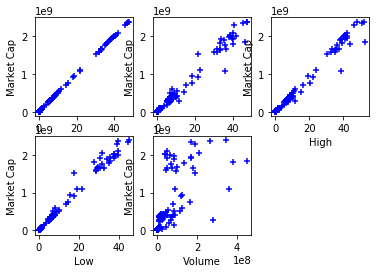

In [13]:
import matplotlib.pyplot as plt
def plot_data(xdata,ydata,xlabel):
    plt.scatter(xdata,ydata,marker='+',color='blue')
    plt.ylabel('Market Cap')
    plt.xlabel(xlabel)
        
plt.subplot(2,3,1)
plot_data(df.Open, df['Market Cap'],'Open')
plt.subplot(2,3,2)
plot_data(df.Close, df['Market Cap'],'Close')
plt.subplot(2,3,3)
plot_data(df.High, df['Market Cap'],'High')
plt.subplot(2,3,4)
plot_data(df.Low, df['Market Cap'],'Low')
plt.subplot(2,3,5)
plot_data(df.Volume, df['Market Cap'],'Volume')

In [14]:
from sklearn import linear_model

model       = linear_model.LinearRegression()
Open        = df[['Open']]
Market_Cap  = df['Market Cap']

In [15]:
# train data using linear regression 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Model Score
model.score(Open, Market_Cap)

0.999926176045498

#### 4. Data Visualization

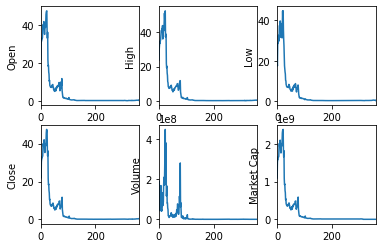

In [17]:
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df.Open.plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df.High.plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df.Low.plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df.Close.plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df.Volume.plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap')
df['Market Cap'].plot()